In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
import requests
requests.__version__

'2.24.0'

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d772c3b05624a66e64198215624dc2ba


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | kavieng
Processing Record 3 of Set 1 | leningradskiy
Processing Record 4 of Set 1 | salalah
Processing Record 5 of Set 1 | kayunga
Processing Record 6 of Set 1 | kieta
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | buala
Processing Record 9 of Set 1 | lagoa
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | yirol
City not found. Skipping...
Processing Record 13 of Set 1 | fukue
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | emerald
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | tarrafal
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | 

Processing Record 38 of Set 4 | cockburn town
Processing Record 39 of Set 4 | assiniboia
Processing Record 40 of Set 4 | nikki
Processing Record 41 of Set 4 | poum
Processing Record 42 of Set 4 | yar-sale
Processing Record 43 of Set 4 | santa maria
Processing Record 44 of Set 4 | dubrovnik
Processing Record 45 of Set 4 | gobabis
Processing Record 46 of Set 4 | esperance
Processing Record 47 of Set 4 | shelburne
Processing Record 48 of Set 4 | candawaga
City not found. Skipping...
Processing Record 49 of Set 4 | redcliffe
Processing Record 50 of Set 4 | cape town
Processing Record 1 of Set 5 | saldanha
Processing Record 2 of Set 5 | canutama
Processing Record 3 of Set 5 | lodja
Processing Record 4 of Set 5 | shelbyville
Processing Record 5 of Set 5 | rio gallegos
Processing Record 6 of Set 5 | mackay
Processing Record 7 of Set 5 | sokoni
Processing Record 8 of Set 5 | saint anthony
Processing Record 9 of Set 5 | altamont
Processing Record 10 of Set 5 | bambanglipuro
Processing Record 11

Processing Record 28 of Set 8 | mount gambier
Processing Record 29 of Set 8 | ketchikan
Processing Record 30 of Set 8 | nadym
Processing Record 31 of Set 8 | deputatskiy
Processing Record 32 of Set 8 | ulladulla
Processing Record 33 of Set 8 | port blair
Processing Record 34 of Set 8 | bambous virieux
Processing Record 35 of Set 8 | pochutla
Processing Record 36 of Set 8 | semenivka
Processing Record 37 of Set 8 | ipira
Processing Record 38 of Set 8 | angleton
Processing Record 39 of Set 8 | horsham
Processing Record 40 of Set 8 | karaton
Processing Record 41 of Set 8 | koungou
Processing Record 42 of Set 8 | patacamaya
Processing Record 43 of Set 8 | maltahohe
Processing Record 44 of Set 8 | middelburg
Processing Record 45 of Set 8 | bandarbeyla
Processing Record 46 of Set 8 | baculin
Processing Record 47 of Set 8 | eureka
Processing Record 48 of Set 8 | sai buri
Processing Record 49 of Set 8 | tarabuco
Processing Record 50 of Set 8 | kadykchan
City not found. Skipping...
Processing R

Processing Record 15 of Set 12 | pundaguitan
Processing Record 16 of Set 12 | abu zabad
Processing Record 17 of Set 12 | panjab
Processing Record 18 of Set 12 | bonthe
Processing Record 19 of Set 12 | dubbo
Processing Record 20 of Set 12 | buluang
Processing Record 21 of Set 12 | kaniama
Processing Record 22 of Set 12 | shingu
Processing Record 23 of Set 12 | san patricio
Processing Record 24 of Set 12 | sobolevo
Processing Record 25 of Set 12 | wajima
Processing Record 26 of Set 12 | manicaragua
Processing Record 27 of Set 12 | kollam
Processing Record 28 of Set 12 | cody
Processing Record 29 of Set 12 | charlestown
Processing Record 30 of Set 12 | chemodanovka
Processing Record 31 of Set 12 | yashkul
Processing Record 32 of Set 12 | skerries
Processing Record 33 of Set 12 | marondera
Processing Record 34 of Set 12 | ishigaki
Processing Record 35 of Set 12 | kailua
Processing Record 36 of Set 12 | kaeo
Processing Record 37 of Set 12 | namwala
Processing Record 38 of Set 12 | tarko-sal

In [13]:
len(city_data)

566

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,76.89,73,89,9.40,PF,2021-02-07 14:18:32
1,Kavieng,-2.5744,150.7967,83.10,76,28,9.84,PG,2021-02-07 14:18:32
2,Leningradskiy,69.3833,178.4167,-12.44,75,15,5.57,RU,2021-02-07 14:18:32
3,Salalah,17.0151,54.0924,77.00,65,75,8.05,OM,2021-02-07 14:18:32
4,Kayunga,0.7025,32.8886,92.66,17,71,6.62,UG,2021-02-07 14:18:32
5,Kieta,-6.2167,155.6333,79.57,82,100,4.76,PG,2021-02-07 14:18:32
6,Buala,-8.1450,159.5921,78.66,82,100,3.02,SB,2021-02-07 14:18:33
7,Lagoa,39.0500,-27.9833,58.53,76,100,19.24,PT,2021-02-07 14:18:33
8,Qaanaaq,77.4840,-69.3632,11.82,88,100,2.39,GL,2021-02-07 14:18:33
9,Carnarvon,-24.8667,113.6333,80.60,100,40,13.80,AU,2021-02-07 14:18:33


In [16]:
#reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.
#Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-02-07 14:18:32,-23.1203,-134.9692,76.89,73,89,9.40
1,Kavieng,PG,2021-02-07 14:18:32,-2.5744,150.7967,83.10,76,28,9.84
2,Leningradskiy,RU,2021-02-07 14:18:32,69.3833,178.4167,-12.44,75,15,5.57
3,Salalah,OM,2021-02-07 14:18:32,17.0151,54.0924,77.00,65,75,8.05
4,Kayunga,UG,2021-02-07 14:18:32,0.7025,32.8886,92.66,17,71,6.62


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

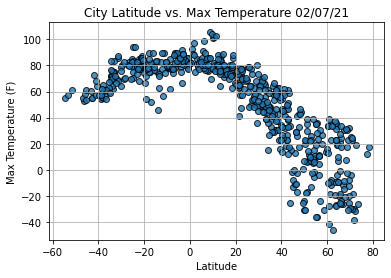

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

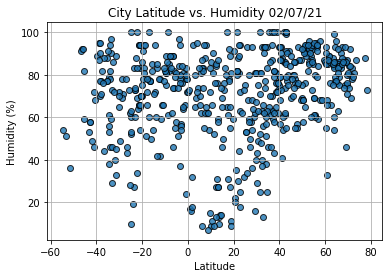

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

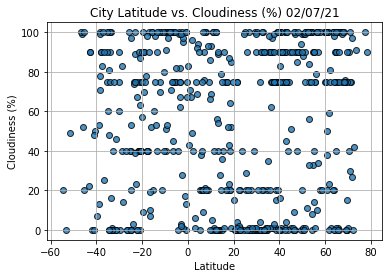

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

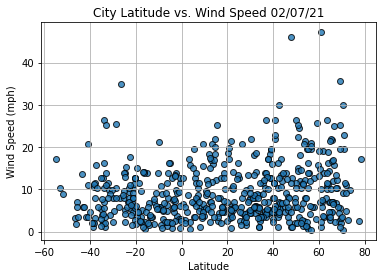

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()